# **Laporan Proyek Machine Learning - Gustania Nirmala Meisi**

## **Soal:**

Asuransi kesehatan adalah salah satu hal yang patut diperhatikan karena bersangkutan dengan kebutuhan perencanaan masa depan. Pengguna asuransi kesehatan diwajibkan untuk membayar besaran uang secara rutin (premi) kepada pihak perusahaan asuransi. Premi tersebut diolah oleh perusahaan asuransi untuk membayarkan tagihan kesehatan pengguna yang tertanggung. Penentuan nilai premi menjadi tantangan tersendiri bagi pihak asuransi mengingat ada banyak faktor yang dapat mempengaruhi & meningkatkan profil resiko pengguna.

Lakukan analisis variable-variabel yang memiliki hubungan dengan tagihan kesehatan yang diterima oleh setiap pengguna. Anda akan diberikan data yang berisi data personal pengguna seperti umur, gender, tempat tinggal pengguna, banyak anak tertanggung asuransi, nilai bmi, keadaan merokok atau tidaknya pengguna.

Dataset:
* age: umur
* sex: jenis kelamin
* BMI: body mass index, rasio tinggi badan terhadap berat badan
* children: jumlah anak yang tercover asuransi
* smoker: status dia merokok atau tidak
* region: wilayah asal
* charges: biaya perawatan

**Soal nomor 1 : <br>Pilih 5 dari 10 pertanyaan**

1. Rata-rata umur pengguna

2. Rata-rata nilai BMI dari pengguna yang merokok

3. Berapa rata rata umur pada data tersebut?

4. Berapa rata rata nilai BMI dari yang merokok?

5. Apakah variansi dari data charges perokok dan non perokok sama?

6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25

9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

**Soal nomor 2: <br>Pilih 5 dari 7 pertanyaan**


1. Gender mana yang memiliki tagihan paling tinggi?

2. Distribusi peluang tagihan di tiap-tiap region

3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

4. Mana yang lebih tinggi proporsi perokok atau non perokok?

5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

7. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

**Soal nomor 3: <br>Kerjakan semuanya**

1. Mencari peluang besar tagihan berdasarkan BMI

2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.

3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok

4. Mana yang lebih mungkin terjadi

* Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau

* Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

5. Mana yang lebih mungkin terjadi

* Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau

* Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

### **JAWABAN**

In [2]:
import pandas as pd #dataframe
import numpy as np #komputasi numerik
#visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns 
data = pd.read_csv('insurance 2.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


**Analisis Deskriptif**

In [2]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Dataset Detail**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Kategori Setiap Kolom**

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


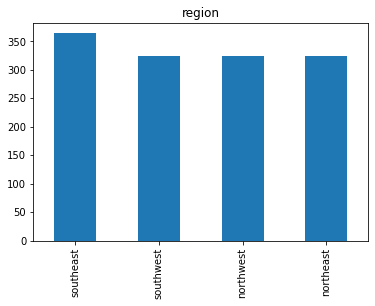

In [8]:
print(data['region'].value_counts())
data['region'].value_counts().plot(kind='bar', title='region');

male      676
female    662
Name: sex, dtype: int64


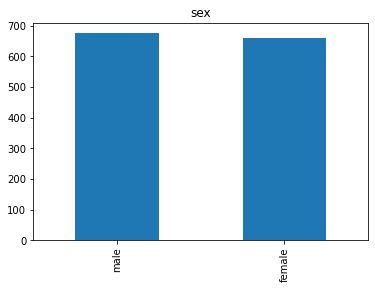

In [9]:
print(data['sex'].value_counts())
data['sex'].value_counts().plot(kind='bar', title='sex');

no     1064
yes     274
Name: smoker, dtype: int64


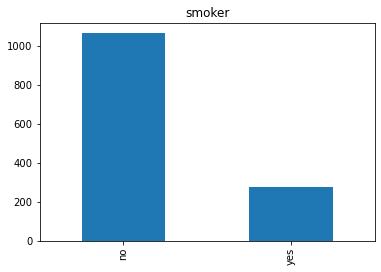

In [10]:
print(data['smoker'].value_counts())
data['smoker'].value_counts().plot(kind='bar', title='smoker');

-----------------------------------------------------------------
**Soal nomor 1 :**

1. Rata-rata umur pengguna


In [51]:
print('Rata-rata umur pengguna : ',data["age"].mean())

Rata-rata umur pengguna :  39.20702541106129


2. Rata-rata nilai BMI dari pengguna yang merokok

In [78]:
perokok = data[(data['smoker'] == 0)]
print('Rata-rata nilai BMI dari pengguna yang merokok adalah 30.651795')
perokok.groupby(["smoker"])["bmi"].mean()

Rata-rata nilai BMI dari pengguna yang merokok adalah 30.651795


smoker
0    30.651795
Name: bmi, dtype: float64

3. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [77]:
perokok = data[(data['smoker'] == 0)] # yes = 0
perempuan = data[(data['sex'] == 0)] #perempuan = 0
laki_laki = data[(data['sex'] == 1)] #laki-laki = 1
print('Rata-rata umur perempuan dan laki-laki yang merokok hampir sama \nLaki-laki adalah 39.061896\nPerempuan adalah 39.691042')
perokok.groupby(["sex","smoker"])["age"].mean()

Rata-rata umur perempuan dan laki-laki yang merokok hampir sama 
Laki-laki adalah 39.061896
Perempuan adalah 39.691042


sex  smoker
0    0         39.691042
1    0         39.061896
Name: age, dtype: float64

4. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [80]:
print('Rata-rata tagihan kesehatan perokok antara non merokok lebih tinggi Perokok')
print('Rata-rata tagihan Perokok 8434.268298')#perokok = 0
print('Rata-rata tagihan Bukan Perokok 32050.231832')#bukan perokok = 1
data.groupby(["smoker"])["charges"].mean()

Rata-rata tagihan kesehatan perokok antara non merokok lebih tinggi Perokok
Rata-rata tagihan Perokok 8434.268298
Rata-rata tagihan Bukan Perokok 32050.231832


smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64

5. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

In [81]:
print('BMI antara seseorang laki-laki dengan perempuan yang lebih tinggi adalah laki-laki')
print('BMI dari Laki-laki adalah 53.13')#laki-laki = 1
print('BMI dari Perempuan adalah 48.07')#perempuan = 0
data.groupby(["sex"])["bmi"].max()

BMI antara seseorang laki-laki dengan perempuan yang lebih tinggi adalah laki-laki
BMI dari Laki-laki adalah 53.13
BMI dari Perempuan adalah 48.07


sex
0    48.07
1    53.13
Name: bmi, dtype: float64

6. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [84]:
print('BMI antara seseorang perokok dengan non perokok yang lebih tinggi adalah non perokok')
print('BMI dari non perokok adalah 53.13')#bukan perokok = 0
print('BMI dari perokok adalah 52.58')#perokok = 1
data.groupby(["smoker"])["bmi"].max()

BMI antara seseorang perokok dengan non perokok yang lebih tinggi adalah non perokok
BMI dari non perokok adalah 53.13
BMI dari perokok adalah 52.58


smoker
0    53.13
1    52.58
Name: bmi, dtype: float64

7. Berapa rata rata nilai BMI dari yang merokok?

In [85]:
perokok = data[(data['smoker'] == 0)]
print('Rata-rata nilai BMI yang merokok adalah 30.651795')
perokok.groupby(["smoker"])["bmi"].mean()

Rata-rata nilai BMI yang merokok adalah 30.651795


smoker
0    30.651795
Name: bmi, dtype: float64

8. Berapa rata rata umur pada data tersebut?

In [86]:
print('Rata-rata umur pada data tersebut adalah ',data["age"].mean())

Rata-rata umur pada data tersebut adalah  39.20702541106129


-----------------------------------------------------------------------------------------------------
**Soal nomor 2:**

1. Gender mana yang memiliki tagihan paling tinggi??

In [87]:
print('Gender yang memiliki tagihan paling tinggi adalah Perempuan')
print('Tagihan perempuan adalah 63770.42801')#perempuan = 0
print('Tagihan laki-laki adalah 62592.87309')#laki-laki = 1
data.groupby(["sex"])["charges"].max()

Gender yang memiliki tagihan paling tinggi adalah Perempuan
Tagihan perempuan adalah 63770.42801
Tagihan laki-laki adalah 62592.87309


sex
0    63770.42801
1    62592.87309
Name: charges, dtype: float64

2. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [36]:
df = pd.DataFrame(data)


from sklearn.preprocessing import LabelEncoder

# Inisiasi label encoder
encode = LabelEncoder()

df['sex'] = encode.fit_transform(df['sex'])
df['smoker'] = encode.fit_transform(df['smoker'])

# P(S) = n(A)/n(S)
female = df[(df['sex'] == 0)]
jumlah_female = female['sex'].count()
perokok = female[(female['smoker']==0)]
bukan_perokok = female[(female['smoker']==1)]

jumlah_perokok = perokok['smoker'].count()
jumlah_bukan_perokok = bukan_perokok['smoker'].count()

print('Jumlah Perokok adalah : ',jumlah_perokok/jumlah_female)
print('Jumlah Bukan Perokok adalah : ',jumlah_bukan_perokok/jumlah_female)

Jumlah Perokok adalah :  0.8262839879154078
Jumlah Bukan Perokok adalah :  0.17371601208459214


3. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [37]:
df = pd.DataFrame(data)


from sklearn.preprocessing import LabelEncoder

# Inisiasi label encoder
encode = LabelEncoder()

df['sex'] = encode.fit_transform(df['sex'])
df['smoker'] = encode.fit_transform(df['smoker'])

# P(S) = n(A)/n(S)
male = df[(df['sex'] == 1)]
jumlah_male = male['sex'].count()
perokok = male[(male['smoker']==0)]
bukan_perokok = male[(male['smoker']==1)]

jumlah_perokok = perokok['smoker'].count()
jumlah_bukan_perokok = bukan_perokok['smoker'].count()

print('Jumlah Perokok adalah : ',jumlah_perokok/jumlah_male)
print('Jumlah Bukan Perokok adalah : ',jumlah_bukan_perokok/jumlah_male)

Jumlah Perokok adalah :  0.764792899408284
Jumlah Bukan Perokok adalah :  0.23520710059171598


4. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [41]:
data['smoker']
varian_smoker = data.groupby('sex')['smoker'].std()

print('Smoker (YES) : ', varian_smoker[0])
print('Smoker (NO) : ', varian_smoker[1])

Smoker (YES) :  0.37915157018983286
Smoker (NO) :  0.42444224142403914


5. Apakah setiap region memiliki proporsi data banyak orang yang sama?

Region (northeast) :  0.5007638548546987
Region (northwest) :  0.5007496754036933
Region (southeast) :  0.5003177629809157
Region (soutwest) :  0.5007686399618396

Dari : 


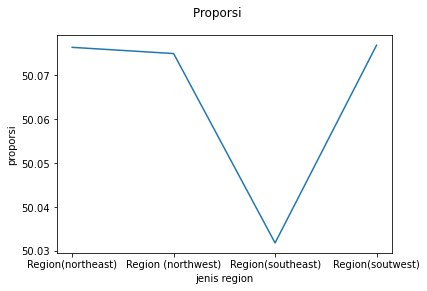

In [40]:
data['region'] = encode.fit_transform(data['region'])
data['sex'] = encode.fit_transform(data['sex'])
varian_region = df.groupby('region')['sex'].std()

print('Region (northeast) : ', varian_region[0])
print('Region (northwest) : ', varian_region[1])
print('Region (southeast) : ', varian_region[2])
print('Region (soutwest) : ', varian_region[3])
print('\nDari : ')

name = ['Region(northeast)', 'Region (northwest)', 'Region(southeast)', 'Region(soutwest)']
values = [varian_region[0]*100, varian_region[1]*100, varian_region[2]*100, varian_region[3]*100]

plt.plot(name, values)
plt.suptitle('Proporsi ')
plt.xlabel('jenis region')
plt.ylabel('proporsi')
plt.show()

-----------------------------------------------------------
**Soal nomor 3:**

1. Mencari peluang besar tagihan berdasarkan BMI

In [88]:
bmi_mean = data.groupby('bmi')['charges'].mean()
urutan = pd.DataFrame(sorted(bmi_mean))
print('Peluang besar tagihan berdasarkan BMI')
urutan[0]

Peluang besar tagihan berdasarkan BMI


0       1149.39590
1       1163.46270
2       1242.26000
3       1242.81600
4       1263.24900
          ...     
543    48824.45000
544    49577.66240
545    51194.55914
546    62592.87309
547    63770.42801
Name: 0, Length: 548, dtype: float64

2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.

In [90]:
perokok_bmi = data[(data['smoker']==0)]
bmi_atas_25 = perokok_bmi[(perokok_bmi['bmi']>25)]
charges_atas = perokok_bmi[(perokok_bmi['charges']>16700)]

pA = bmi_atas_25['bmi'].count() / perokok_bmi['bmi'].count()
print('Peluang seorang perokok diatas dengan BMI diatas 25 ',pA)

pB = charges_atas['bmi'].count() / perokok_bmi['bmi'].count()
print('Peluang tgiahan diatas 16.700 ',pB)

pTerjadi = pA * pB
print('Peluang terjadinya : ',pTerjadi)

Peluang seorang perokok diatas dengan BMI diatas 25  0.8195488721804511
Peluang tgiahan diatas 16.700  0.07518796992481203
Peluang terjadinya :  0.06162021595341738


3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok

Peluang seseorang acak tagihan kesehatannya diatas 16.700 diketahui dia adalah perokok :  0.07518796992481203
Peluang seseorang acak tagihan kesehatannya dibawah 16.700 diketahui dia adalah perokok :  0.924812030075188


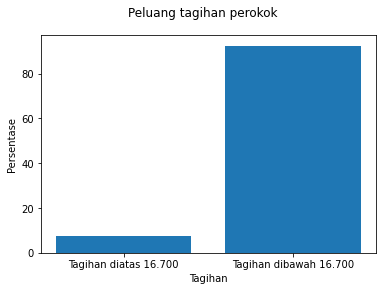

In [50]:
perokok_charges = data[(data['smoker']==0)]

hitung_perokok_charges = perokok_charges['smoker'].count()
perokok_charges_atas = perokok_bmi[(perokok_bmi['charges']>16700)]
perokok_charges_bawah = perokok_bmi[(perokok_bmi['charges']<16700)]

charges_up = perokok_charges_atas['charges'].count() / hitung_perokok_charges
charges_down = perokok_charges_bawah['charges'].count() / hitung_perokok_charges

print("Peluang seseorang acak tagihan kesehatannya diatas 16.700 diketahui dia adalah perokok : ",charges_up)
print("Peluang seseorang acak tagihan kesehatannya dibawah 16.700 diketahui dia adalah perokok : ",charges_down)

name = ['Tagihan diatas 16.700','Tagihan dibawah 16.700']
value = [charges_up*100, charges_down*100]

plt.bar(name,value)
plt.suptitle('Peluang tagihan perokok')
plt.xlabel('Tagihan')
plt.ylabel('Persentase')
plt.show()

4. Mana yang lebih mungkin terjadi

* Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau

* Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [48]:
perokok_bmi = data[(data['smoker']==0)]
bmi_atas_25 = perokok_bmi[(perokok_bmi['bmi'] > 25)]
bmi_bawah_25 = perokok_bmi[(perokok_bmi['bmi'] < 25)]

hitung_perokok = perokok_bmi[(perokok_bmi['charges'] > 16700)]
x_bmi_charges = bmi_atas_25[(bmi_atas_25['charges'] > 16700)]
y_bmi_charges = bmi_bawah_25[(bmi_bawah_25['charges'] > 16700)]

pA = x_bmi_charges['bmi'].count()/hitung_perokok['bmi'].count()
pB = y_bmi_charges['bmi'].count()/hitung_perokok['bmi'].count()

print('BMI diatas 25 yang mendapatkan tagihan kesehatan diatas 16700 adalah : ',pA)
print('BMI dibawah 25 yang mendapatkan tagihan kesehatan diatas 16700 adalah : ',pB)

BMI diatas 25 yang mendapatkan tagihan kesehatan diatas 16700 adalah :  0.85
BMI dibawah 25 yang mendapatkan tagihan kesehatan diatas 16700 adalah :  0.15


5. Mana yang lebih mungkin terjadi

* Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau

* Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [92]:
perokok_bmi = data[(data['smoker'] == 0)]
bukan_perokok_bmi = data[(data['smoker'] == 1)]

x_diatas_25 = perokok_bmi[(perokok_bmi['bmi'] > 25)]
x_dibawah_25 = perokok_bmi[(perokok_bmi['bmi'] < 25)]

y_diatas_bmi = bukan_perokok_bmi[(bukan_perokok_bmi['bmi'] > 25)]
y_dibawah_bmi = bukan_perokok_bmi[(bukan_perokok_bmi['bmi'] < 25)]

x_hitung_perokok = perokok_bmi[(perokok_bmi['charges'] > 16700)]
y_hitung_perokok = bukan_perokok_bmi[(bukan_perokok_bmi['charges'] > 16700)]

x_charges_atas_16a = x_diatas_25[(x_diatas_25['charges'] > 16700)]
y_charges_atas_16a = x_dibawah_25[(x_dibawah_25['charges'] > 16700)]

x_charges_atas_16b = y_diatas_bmi[(y_diatas_bmi['charges'] > 16700)]
y_charges_atas_16b = y_dibawah_bmi[(y_dibawah_bmi['charges'] > 16700)]

# P(A) = n(A)/n(S)
# jumlah perokok dan tidak perokok
perokok = perokok_bmi['smoker'].count()
bukan_perokok  = bukan_perokok_bmi['smoker'].count()

# jumlah perokok dengan BMI 25 dan BMI dibawah 25
perokok_bmi_atas = x_diatas_25['bmi'].count()
perokok_bmi_bawah = x_dibawah_25['bmi'].count()

# jumlah tidak perokok dengan BMI 25 dan BMI dibawah 25
bukan_perokok_bmi_atas = y_diatas_bmi['bmi'].count()
bukan_perokok_bmi_bawah = y_dibawah_bmi['bmi'].count()

# jumlah tidak perokok dengan tagihan diatas 16.7K
x_hitung_perokok
y_hitung_perokok

# peluang dari perokok dengan BMI 25 dan tagihan diatas 16.7K
Pax = perokok_bmi_atas / perokok
Pay = perokok_bmi_bawah / perokok

Pbx = x_charges_atas_16a['charges'].count() / x_hitung_perokok['charges'].count()
Pby = y_charges_atas_16a['charges'].count() / x_hitung_perokok['charges'].count()

# peluang dari non-perokok dengan BMI 25 dan tagihan diatas 16.7K
Pcx = bukan_perokok_bmi_atas / bukan_perokok
Pcy = bukan_perokok_bmi_bawah / bukan_perokok

Pdx = x_charges_atas_16b['charges'].count() / y_hitung_perokok['charges'].count()
Pdy = y_charges_atas_16b['charges'].count() / y_hitung_perokok['charges'].count()


Xx = ((Pax+Pbx) / 2) # Perokok
Xy = ((Pcx+Pdy) / 2) # Non-Perokok

print('Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.700 adalah ',Xx)
print('Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.700 adalah ',Xy)

Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.700 adalah  0.8347744360902256
Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.700 adalah  0.4764066900396574
